# Zuber, una nueva empresa de viajes compartidos 
Se tienen datos de viajes de varias compañías de taxis, partir de estos se va a:
- Estudiar los datos que contienen las bases de datos.
- Identificar los 10 principales barrios en términos de finalización y las 10 principales compañías de taxis.
- Graficar: empresas de taxis y número de viajes, los 10 barrios principales por finalizaciones y número de viajes.
- Hacer la prueba de hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Descripción de los datos
Una base de datos con información sobre viajes en taxi en Chicago:

Tabla neighborhoods: datos sobre los barrios de la ciudad
* name: nombre del barrio
* neighborhood_id: código del barrio

Tabla cabs: datos sobre los taxis
* cab_id: código del vehículo
* vehicle_id: ID técnico del vehículo
* company_name: la empresa propietaria del vehículo

Tabla trips: datos sobre los viajes
* trip_id: código del viaje
* cab_id: código del vehículo que opera el viaje
* start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
* end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
* duration_seconds: duración del viaje en segundos
* distance_miles: distancia del viaje en millas
* pickup_location_id: código del barrio de recogida
* dropoff_location_id: código del barrio de finalización

Tabla weather_records: datos sobre el clima
* record_id: código del registro meteorológico
* ts: fecha y hora del registro (tiempo redondeado a la hora)
* temperature: temperatura cuando se tomó el registro
* description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

Pasos del proyecto:
1. Preprocesamiento de datos
2. Análisis exploratorio de datos
3. Prueba la hipótesis de que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

## Preprocesamiento de datos

In [1]:
#Se importan las librerias que se van a utilizar

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [3]:
#Se importan los archivos de datos

company = pd.read_csv('/datasets/project_sql_result_01.csv')

neighborhood = pd.read_csv('/datasets/project_sql_result_04.csv')

ride = pd.read_csv('/datasets/project_sql_result_07.csv') 

### Company

In [8]:
#Información general
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Para los datos 'company', los nombres de las columnas tienen un formato adecuado, no hay valores ausentes y los tipos de datos son correctos.

In [9]:
#Compañias de taxis y sus viajes
company.head() 

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [14]:
 #Se verifica si hay valores duplicados
company.duplicated().sum()

0

### Neighborhood

In [10]:
#información general
neighborhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Para los datos 'neighborhood', los nombres de las columnas tienen un formato adecuado, no hay valores ausentes y los tipos de datos son correctos.

In [5]:
#Ubicación de las finalizaciones de los viajes y sus viajes promedio
neighborhood.head() 

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [15]:
 #Se verifica si hay valores duplicados
neighborhood.duplicated().sum()

0

### Ride

In [11]:
#Información general
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Para los datos 'ride', los nombres de las columnas tienen un formato adecuado, no hay valores ausentes y los tipos de datos son correctos en su mayoría. Sin embargo, el de fecha y hora de inicio debe cambiarse a datetime.

In [12]:
#Viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.
ride.head() 

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [13]:
#Se cambia el tipo de dato de la hora y fecha de incio
ride['start_ts'] = pd.to_datetime(ride['start_ts'], format = '%Y-%m-%d %H:%M:%S')
ride.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [17]:
#Se verifica si hay valores duplicados
ride.duplicated().sum()

197

In [18]:
#Se eliminan los valores duplicados
ride.drop_duplicates(inplace=True)

In [19]:
#Se comprueban de nuevo los duplicados
ride.duplicated().sum()

0

## Análisis exploratorio

### 10 principales barrios en términos de finalización

In [20]:
#Se organizan los viajes promedios en forma descendente para saber cuales son los princilaes.
neighborhood.sort_values(by=['average_trips'], ascending=False) 

#Se crea un dataframe con los 10 principales barrios en terminos de finalización.
nbh10 = neighborhood.head(10) 
nbh10

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Principales compañías de taxi

In [21]:
#Se organizan los viajes en forma descendente para saber cuales son los princilaes
company.sort_values(by=['trips_amount'], ascending=False) 

#Se crea un dataframe con las 10 principales compañías de taxis
c10 = company.head(10) 
c10

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### Empresas de taxis VS número de viajes

<AxesSubplot:title={'center':'Empresas de taxis y número de viajes'}, xlabel='Compañía de taxis', ylabel='Número de viajes'>

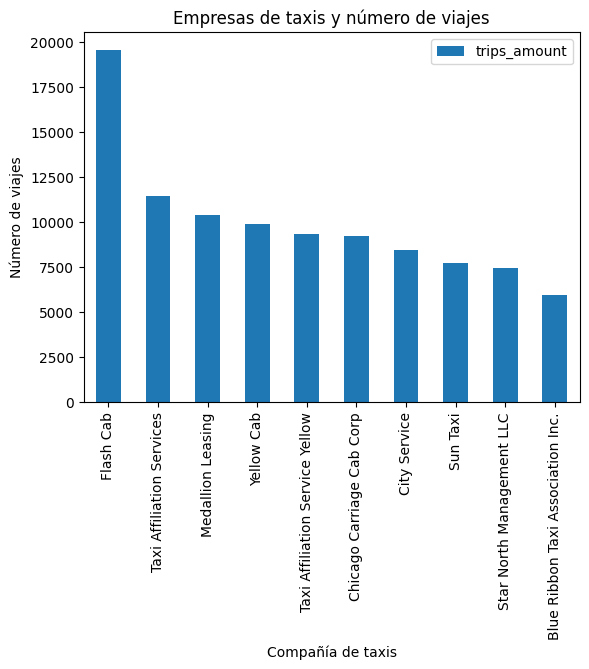

In [22]:
c10.plot(kind='bar',
            x='company_name',
            y='trips_amount',
            xlabel='Compañía de taxis',
            ylabel='Número de viajes',
            title='Empresas de taxis y número de viajes')

La compañía Flash Cab hace casi el doble y hasta más de viajes que las demás compañías.

### 10 barrios principales de finalización por número promedio de viajes

<AxesSubplot:title={'center':'10 barrios de finalización principales por número promedio de viajes'}, xlabel='Barrio de finalización', ylabel='Viajes promedio'>

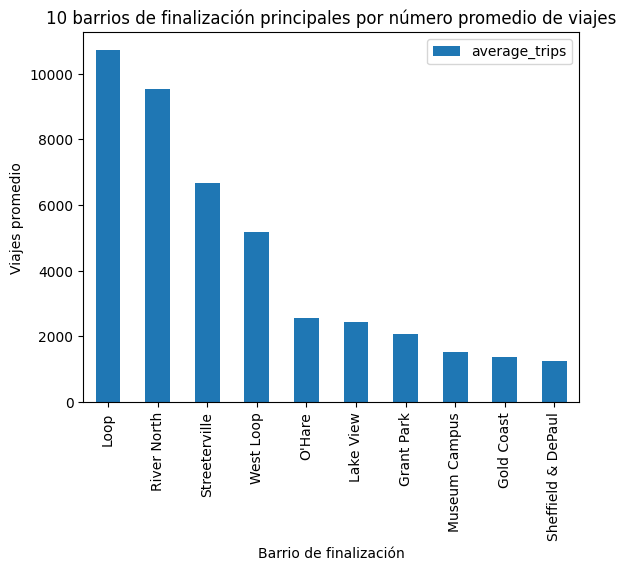

In [24]:
nbh10.plot(kind='bar',
          x='dropoff_location_name',
          y='average_trips',
          xlabel='Barrio de finalización',
          ylabel='Viajes promedio',
          title='10 barrios de finalización principales por número promedio de viajes')

Los barrios principales son Loop, River North, Streeterville and West Loop, seguidos por menos de la mitad de viajes promedio por los demás barrios.

## Prueba de hipótesis

In [25]:
#Se crea una columna con el día para trabajar con los sabádos

ride['day'] = ride['start_ts'].dt.day
ride.head()

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,25
1,2017-11-25 14:00:00,Good,1920.0,25
2,2017-11-25 12:00:00,Good,1543.0,25
3,2017-11-04 10:00:00,Good,2512.0,4
4,2017-11-11 07:00:00,Good,1440.0,11


In [26]:
ride['day'].unique()

array([25,  4, 11, 18])

Los sabádos del mes de noviembre del 2017 corresponde a los días: 4, 11, 18 y 25. No es necesario aplicar ningún filtro

Probar la hipótesis "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos":

Hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sabádos lluviosos y los sabádos no lluviosos.
Hipótesis alternativa: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es cambia los sabádos lluviosos y los sabádos no lluviosos.

In [27]:
bad = ride[ride['weather_conditions'] == 'Bad']
duration_bad = bad['duration_seconds']

good = ride[ride['weather_conditions'] == 'Good']
duration_good = good['duration_seconds']

alpha = 0.05

result = st.ttest_ind(duration_bad, duration_good, equal_var = False)

print('Valor-p:', result.pvalue)

if (result.pvalue < alpha):
    print('Se rechaza la hipótesis nula')
else: 
    print('No se puede rechazar la hipótesis nula')

Valor-p: 9.126383933880083e-08
Se rechaza la hipótesis nula


A partir de la prueba de hipótesis se puede rechazar la hipótesis nula, es decir: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos y los sábados no lluviosos

# Conclusión

La mayor competencia para la compañía `Zuber`, es `Flash Cab`, ya que esta hace casi el doble y hasta más, de viajes que las demás compañías.

Zuber desde ya sabe que hay una alta probabilidad de que la mayoría de las veces, los barrios de finalización sean `Loop`, `River North`, `Streeterville` y `West Loop`.

Respecto a cambios por el clima, se sabe que la duración promedio de los viajes desde el `Loop` hasta el `Aeropuerto Internacional O'Hare`, los días sábados, cambia dependiendo de si está lloviendo o no.